In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, KBinsDiscretizer

In [4]:
# Laoding Dataset 
df = pd.read_csv('Titanic_dataset_com.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 153.6+ KB


In [6]:
df.describe()

,PassengerId,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,655.000000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,328.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,655.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,982.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
df.head()

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Solving Missing Values

### Drop rows which are all NaNs

In [8]:
df.dropna(how = 'all', inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 163.6+ KB


#### Age

In [10]:
df_age_median = df.groupby(['sex', 'pclass'])['age'].median().reset_index()
df_age_median

,sex,pclass,age
0,female,1.0,36.0
1,female,2.0,28.0
2,female,3.0,22.0
3,male,1.0,42.0
4,male,2.0,29.5
5,male,3.0,25.0


In [11]:
def impute_age(row):
    condition = (
        (df_age_median['sex'] == row['sex']) &
        (df_age_median['pclass'] == row['pclass'])
    )
    # Check if there are rows that meet the condition
    if condition.any():
        return df_age_median[condition]['age'].values[0]
    else:
        # Handle the case where there are no matching rows
        return None

In [12]:
# Apply the impute_age function to fill missing values in 'Age' column
df['age'] = df.apply(lambda row: impute_age(row) if pd.isnull(row['age']) else row['age'], axis=1)

__________________________

#### Fare

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1309 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 163.6+ KB


In [14]:
df.dropna(subset = ['fare'], inplace = True)

________________________

#### Cabin

In [15]:
# Fill missing "Cabin" values based on passenger class
class_cabin_mapping = df.groupby('pclass')['cabin'].transform(lambda x: x.fillna(x.mode()[0]))
# Update the "Cabin" column with the imputed values
df['cabin'] = class_cabin_mapping

In [16]:
df['Cabin_Deck'] = df['cabin'].str[0]
df['Has_Cabin'] = df['cabin'].notna().astype(int)
df.drop(columns=['cabin'], inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1308 non-null   float64
 1   pclass       1308 non-null   float64
 2   survived     1308 non-null   float64
 3   name         1308 non-null   object 
 4   sex          1308 non-null   object 
 5   age          1308 non-null   float64
 6   sibsp        1308 non-null   float64
 7   parch        1308 non-null   float64
 8   ticket       1308 non-null   object 
 9   fare         1308 non-null   float64
 10  embarked     1306 non-null   object 
 11  boat         486 non-null    object 
 12  body         120 non-null    float64
 13  home.dest    745 non-null    object 
 14  Cabin_Deck   1308 non-null   object 
 15  Has_Cabin    1308 non-null   int32  
dtypes: float64(8), int32(1), object(7)
memory usage: 168.6+ KB


_______________________

#### Embarked

In [18]:
df.fillna(value={'embarked': df['embarked'].mode()[0]}, inplace= True)

______________

#### Boat

***NaNs Value of boat and survived : 1***

In [19]:
# condition for filling missing values
condition = (df['survived'] == 1) & (df['boat'].isnull())

# Calculate the mode of the "boat" column
boat_mode = df['boat'].mode()[0]

# Use fillna() to replace missing values based on the condition
df.loc[condition, 'boat'] = boat_mode

***NaNs Value of boat and survived : 0***

In [20]:
#imputing based on Pclass and Sex
boat_mode_by_class_sex = df.groupby(['pclass', 'sex'])['boat'].transform(lambda x: x.mode()[0])
df['boat'].fillna(boat_mode_by_class_sex, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1308 non-null   float64
 1   pclass       1308 non-null   float64
 2   survived     1308 non-null   float64
 3   name         1308 non-null   object 
 4   sex          1308 non-null   object 
 5   age          1308 non-null   float64
 6   sibsp        1308 non-null   float64
 7   parch        1308 non-null   float64
 8   ticket       1308 non-null   object 
 9   fare         1308 non-null   float64
 10  embarked     1308 non-null   object 
 11  boat         1308 non-null   object 
 12  body         120 non-null    float64
 13  home.dest    745 non-null    object 
 14  Cabin_Deck   1308 non-null   object 
 15  Has_Cabin    1308 non-null   int32  
dtypes: float64(8), int32(1), object(7)
memory usage: 168.6+ KB


____________

#### Body & Home.dest

In [22]:
df.drop(columns=['body', 'home.dest'], inplace = True)

# Data Reduction & Data Transformation

### Data Discretization

In [23]:
def k_bins_discretizer(df, columns, n_bins, encode, strategy):
    dis = KBinsDiscretizer(n_bins=n_bins, encode=encode, strategy=strategy)
    for col in columns:
        df[col] = dis.fit_transform(df[[col]])
        df = df.astype({col: 'int'})
    return df

In [24]:
df = k_bins_discretizer(df, columns=['age', 'fare'], n_bins=5, encode='ordinal', strategy='uniform')

In [25]:
df.head()

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,Cabin_Deck,Has_Cabin
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,1,0.0,0.0,24160,2,S,2,B,1
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",male,0,1.0,2.0,113781,1,S,11,C,1
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",female,0,1.0,2.0,113781,1,S,8,C,1
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,1,1.0,2.0,113781,1,S,3,C,1
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,1.0,2.0,113781,1,S,8,C,1


## One-Hot Encoding

In [26]:
def one_hot(df, columns):
    return pd.get_dummies(df, columns=columns, dtype='int')

In [27]:
df = one_hot(df, columns=['sex'])

In [28]:
df.head()

,PassengerId,pclass,survived,name,age,sibsp,parch,ticket,fare,embarked,boat,Cabin_Deck,Has_Cabin,sex_female,sex_male
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,0.0,0.0,24160,2,S,2,B,1,1,0
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",0,1.0,2.0,113781,1,S,11,C,1,0,1
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",0,1.0,2.0,113781,1,S,8,C,1,1,0
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,1.0,2.0,113781,1,S,3,C,1,0,1
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,1.0,2.0,113781,1,S,8,C,1,1,0


## LabelEncoding

In [29]:
def labelencoder(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

In [30]:
df = labelencoder(df, columns=['Cabin_Deck'])

In [31]:
df.head()

,PassengerId,pclass,survived,name,age,sibsp,parch,ticket,fare,embarked,boat,Cabin_Deck,Has_Cabin,sex_female,sex_male
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,0.0,0.0,24160,2,S,2,1,1,1,0
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",0,1.0,2.0,113781,1,S,11,2,1,0,1
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",0,1.0,2.0,113781,1,S,8,2,1,1,0
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,1.0,2.0,113781,1,S,3,2,1,0,1
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,1.0,2.0,113781,1,S,8,2,1,1,0


## Drop Un-Necessary Columns

In [32]:
df.drop(columns=['ticket', 'PassengerId'], inplace = True)

## Correct Datatypes

In [33]:
def change_data_type(df):
    df = df.astype({'pclass' : 'int', 'survived' : 'int', 'age': 'int', 'sibsp' :'int', 'parch': 'int', 'fare': 'int'})
    return df

In [34]:
change_data_type(df)

,pclass,survived,name,age,sibsp,parch,fare,embarked,boat,Cabin_Deck,Has_Cabin,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",1,0,0,2,S,2,1,1,1,0
1,1,1,"Allison, Master. Hudson Trevor",0,1,2,1,S,11,2,1,0,1
2,1,0,"Allison, Miss. Helen Loraine",0,1,2,1,S,8,2,1,1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,1,2,1,S,3,2,1,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,1,2,1,S,8,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,1,0,0,C,13,6,1,1,0
1305,3,0,"Zabour, Miss. Thamine",1,1,0,0,C,13,6,1,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",1,0,0,0,C,15,6,1,0,1
1307,3,0,"Zakarian, Mr. Ortin",1,0,0,0,C,15,6,1,0,1


In [35]:
df['embarked'] = df['embarked'].astype('category')

In [36]:
df.head()

,pclass,survived,name,age,sibsp,parch,fare,embarked,boat,Cabin_Deck,Has_Cabin,sex_female,sex_male
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,0.0,0.0,2,S,2,1,1,1,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,1.0,2.0,1,S,11,2,1,0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,1.0,2.0,1,S,8,2,1,1,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,1.0,2.0,1,S,3,2,1,0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,1.0,2.0,1,S,8,2,1,1,0


## Name Format

In [37]:
df[['last_name', 'title', 'first_name', 'middle_name']] = df['name'].str.split(', |\.', expand=True)
df.drop(columns=['name', 'middle_name'], inplace = True)
df.head()

,pclass,survived,age,sibsp,parch,fare,embarked,boat,Cabin_Deck,Has_Cabin,sex_female,sex_male,last_name,title,first_name
0,1.0,1.0,1,0.0,0.0,2,S,2,1,1,1,0,Allen,Miss,Elisabeth Walton
1,1.0,1.0,0,1.0,2.0,1,S,11,2,1,0,1,Allison,Master,Hudson Trevor
2,1.0,0.0,0,1.0,2.0,1,S,8,2,1,1,0,Allison,Miss,Helen Loraine
3,1.0,0.0,1,1.0,2.0,1,S,3,2,1,0,1,Allison,Mr,Hudson Joshua Creighton
4,1.0,0.0,1,1.0,2.0,1,S,8,2,1,1,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)


## Columns Order

In [38]:
df = df[['title', 'last_name', 'first_name', 'pclass', 'survived', 'sex_female', 'sex_male', 'age', 'sibsp', 'parch', 'fare', 'embarked',
                 'boat', 'Cabin_Deck', 'Has_Cabin']]

In [39]:
df.head()

,title,last_name,first_name,pclass,survived,sex_female,sex_male,age,sibsp,parch,fare,embarked,boat,Cabin_Deck,Has_Cabin
0,Miss,Allen,Elisabeth Walton,1.0,1.0,1,0,1,0.0,0.0,2,S,2,1,1
1,Master,Allison,Hudson Trevor,1.0,1.0,0,1,0,1.0,2.0,1,S,11,2,1
2,Miss,Allison,Helen Loraine,1.0,0.0,1,0,0,1.0,2.0,1,S,8,2,1
3,Mr,Allison,Hudson Joshua Creighton,1.0,0.0,0,1,1,1.0,2.0,1,S,3,2,1
4,Mrs,Allison,Hudson J C (Bessie Waldo Daniels),1.0,0.0,1,0,1,1.0,2.0,1,S,8,2,1


# Data Exploration

### Survival Distribution

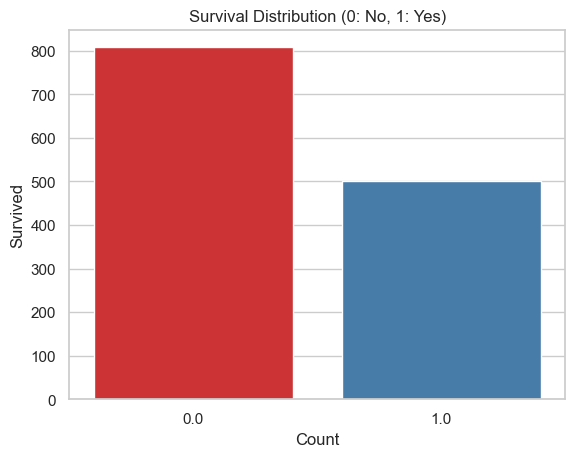

In [40]:
sns.set(style="whitegrid")
sns.countplot(x = 'survived', data = df, palette = 'Set1')    # creating coundplot
plt.title("Survival Distribution (0: No, 1: Yes)")            # set title for countplot
plt.ylabel("Survived")                                        # title of y-axis
plt.xlabel("Count")                                           # title of x-axis
plt.show()

### pclass Distribution

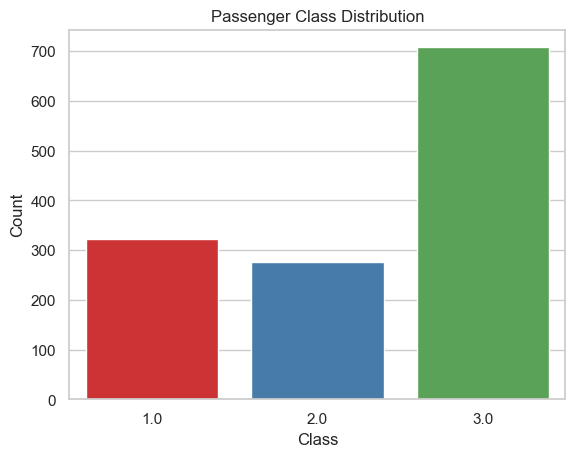

In [41]:
sns.set(style = 'whitegrid')
sns.countplot(x = 'pclass', data = df , palette = 'Set1')
plt.title("Passenger Class Distribution")
plt.ylabel('Count')
plt.xlabel("Class")
plt.show()

### Correlation Matrix

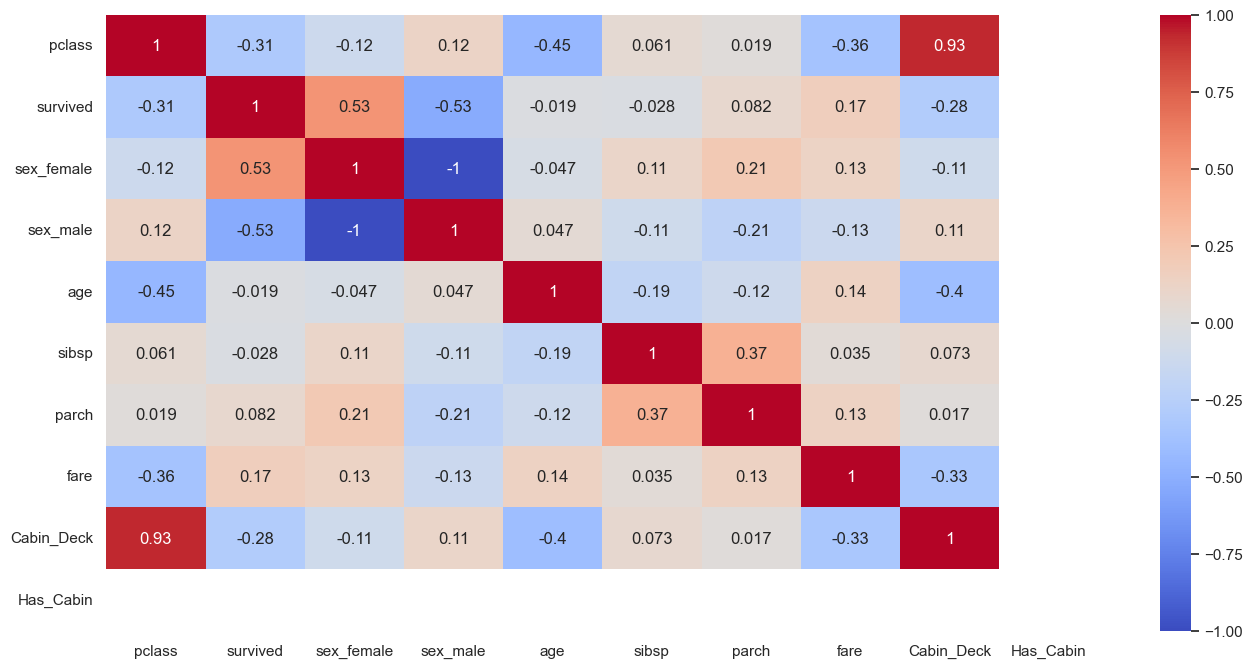

In [42]:
corr_df = df[['pclass','survived', 'sex_female', 'sex_male', 'age', 'sibsp','parch', 'fare','Cabin_Deck', 'Has_Cabin']].corr()
plt.figure(figsize = (16, 8))
sns.heatmap(data = corr_df, annot = True, cmap = 'coolwarm')
plt.show()

_____________

# Save

In [196]:
# df.to_csv('final_preprocessed.csv', index = False)

In [43]:
df

,title,last_name,first_name,pclass,survived,sex_female,sex_male,age,sibsp,parch,fare,embarked,boat,Cabin_Deck,Has_Cabin
0,Miss,Allen,Elisabeth Walton,1.0,1.0,1,0,1,0.0,0.0,2,S,2,1,1
1,Master,Allison,Hudson Trevor,1.0,1.0,0,1,0,1.0,2.0,1,S,11,2,1
2,Miss,Allison,Helen Loraine,1.0,0.0,1,0,0,1.0,2.0,1,S,8,2,1
3,Mr,Allison,Hudson Joshua Creighton,1.0,0.0,0,1,1,1.0,2.0,1,S,3,2,1
4,Mrs,Allison,Hudson J C (Bessie Waldo Daniels),1.0,0.0,1,0,1,1.0,2.0,1,S,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Miss,Zabour,Hileni,3.0,0.0,1,0,0,1.0,0.0,0,C,13,6,1
1305,Miss,Zabour,Thamine,3.0,0.0,1,0,1,1.0,0.0,0,C,13,6,1
1306,Mr,Zakarian,Mapriededer,3.0,0.0,0,1,1,0.0,0.0,0,C,15,6,1
1307,Mr,Zakarian,Ortin,3.0,0.0,0,1,1,0.0,0.0,0,C,15,6,1
